In [1]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import ipywidgets

In [2]:
col_names=['x1','x2','x3','x4']
df = pd.read_csv('PCA.csv', 
                 sep=",", 
                 skiprows=1,
                 names=col_names)

- a) Plot the time series for each variable. [1 point for the plot(s)] 
- b) Perform PCA on the data. [1 point for correct size of input data and correct output of PCA] 
- c) Find which modes you want to keep in order to reconstruct the data and provide a rationale for your selection. [1 point for the choice of modes and 1 point for the rationale]. 
- d) Plot the PCs of the significant modes (i.e. those that you kept) in time. Briefly discuss the results (what are these plots telling you?) [1 point for the plot(s) and 1 point for the discussion.] 
- e) Plot PC1 vs PC2.  Discuss any feature that you find interesting.  [1 point for the plot, 1 point for the discussion.] 
 

### Plot the time series for each variable

[0, 40, -4.5, 4.5]

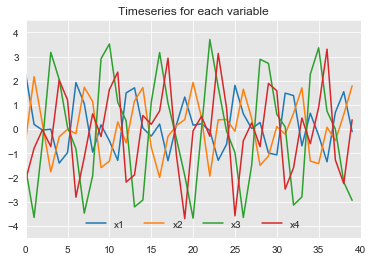

In [3]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax = df.plot()
ax.set_title('Timeseries for each variable')
ax.legend(frameon=False, loc='lower center', ncol=len(col_names))
ax.axis([0,40,-4.5,4.5])

###  Perform PCA on the data.

In [4]:
#normalize data and check it out

data_norm = (df - df.mean())/df.std()
data_norm.head()

,x1,x2,x3,x4
0,2.054100,-0.416833,-0.640717,-1.130501
1,0.035178,1.840631,-1.503714,-0.388076
2,-0.190631,0.153166,-0.193946,0.049160
3,-0.156576,-1.577842,1.403164,-0.349166
4,-1.516147,-0.318572,0.926750,1.220702


In [5]:
## We want to run PCA
n_modes = np.min(np.shape(data_norm))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data_norm)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

n=2
print(np.sum(fracVar[:n])*100)  #sum of the first n modes = total percent variance explained by the first neigvecs
print(np.shape(eigvecs))

97.61264720571651
(4, 4)


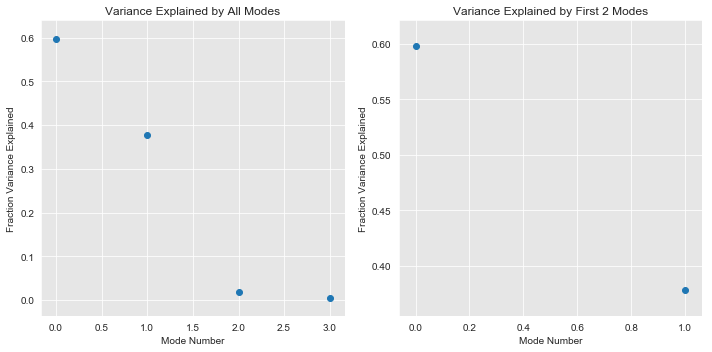

In [6]:
#plot fraction of variance explained by each mode

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = n
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')
plt.tight_layout()
plt.show()

In [7]:
#investigate: did PCA work as we expected?  What size of variables do we expect?

nObservations = np.shape(data_norm)[0] #number of images
nVariables = np.shape(data_norm)[1] #number of pixels in each image (i.e. the number of variables that defines each observation)

print('Expected sizes:')
print('\t' + str(nVariables) + ' eigenvectors, each of length ' + str(nVariables))
print('\t' + str(nVariables) + ' eigenvalues, one for each eigenvector')
print('\t' + str(nVariables) + ' PCs, each of length ' + str(nObservations))

print('Actual sizes:')
print('\t' + str(np.shape(eigvecs)[0]) + ' eigenvectors, each of length ' + str(np.shape(eigvecs)[1]))
print('\t' + str(len(fracVar)) + ' eigenvalues')
print('\t' + str(np.shape(PCs)[1]) + ' PCs, each of length ' + str(np.shape(PCs)[0]))


Expected sizes:
	4 eigenvectors, each of length 4
	4 eigenvalues, one for each eigenvector
	4 PCs, each of length 40
Actual sizes:
	4 eigenvectors, each of length 4
	4 eigenvalues
	4 PCs, each of length 40


### Find which modes you want to keep in order to reconstruct the data and provide a rationale for your selection. [1 point for the choice of modes and 1 point for the rationale].

I want to keep the first 2 modes because they explain 97.61264720571651% of all the variance. Eventhough there is a drop off after the first mode, the reason I kept the first two was because just the first one explained only 59.7855606277414% of the variance. 

### Plot the PCs of the significant modes (i.e. those that you kept) in time. <font color='red'>Briefly discuss the results (what are these plots telling you?) [1 point for the plot(s) and 1 point for the discussion.]</font>

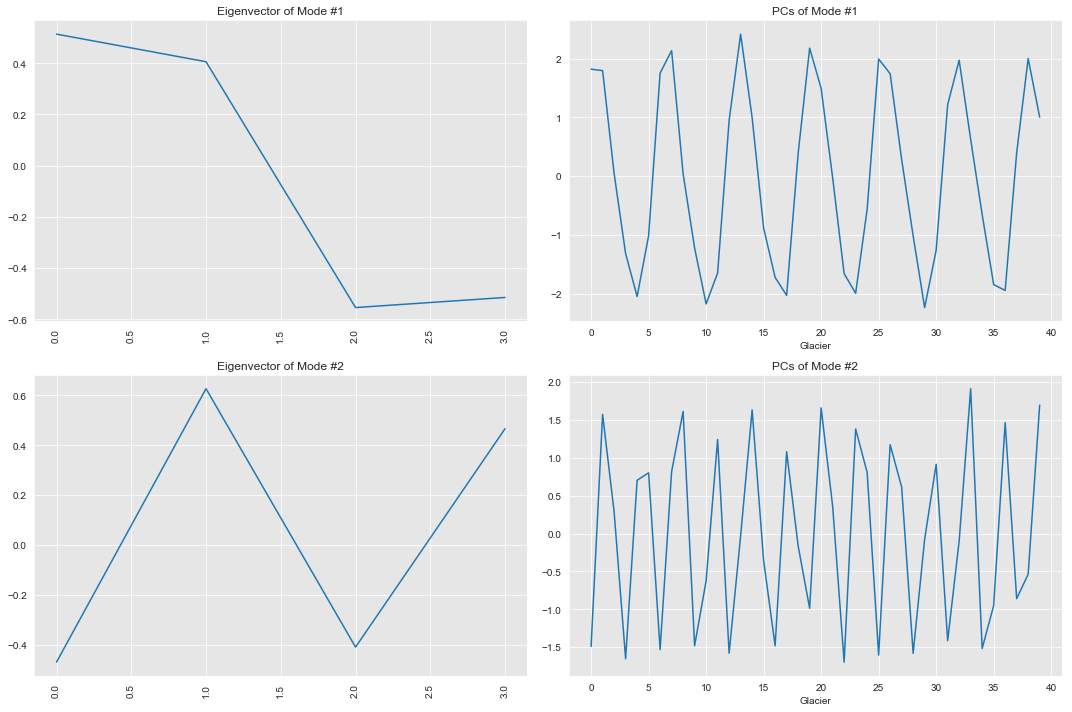

In [8]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!

plt.figure(figsize=(15,5*n))
for kk in range(n):
    
    plt.subplot(n,2,kk*2+1)
#     plt.plot(list(data_norm.columns),eigvecs[kk])
    plt.plot(eigvecs[kk])
    plt.xticks(rotation=90)
    plt.title('Eigenvector of Mode #' + str(kk+1))
    
    plt.subplot(n,2,(kk+1)*2)
    plt.plot(PCs[:,kk])
    plt.title('PCs of Mode #' + str(kk+1))
    plt.xlabel('Glacier')
    
plt.tight_layout()

### Reconstruction using the significant modes

In [9]:
# numModes = n
# numObs = np.max(np.shape(data_norm))

# glacier_rec = np.empty_like(data_norm)
# glacier_mean = data_norm.mean(axis=1)


# for kk in range(numObs): #for each glacier
#     this_glacier_rec = np.zeros_like(data_norm.iloc[0,:])                               
#     for mode in range(numModes):
#         this_glacier_rec += eigvecs[mode,:]*PCs[kk,mode]
#     glacier_rec[kk,:] = this_glacier_rec

### Plot PC1 vs PC2. <font color='red'>Discuss any feature that you find interesting. [1 point for the plot, 1 point for the discussion.]</font>

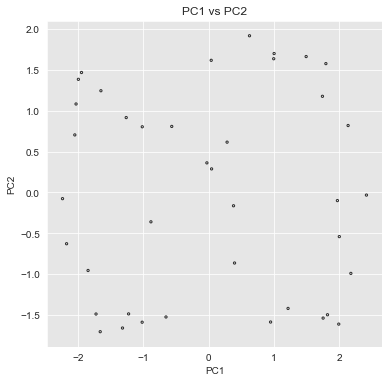

In [10]:
#plot PC1 vs PC2 

plt.figure(figsize=(6,6))
plt.scatter(PCs[:,0],PCs[:,1],s=5,facecolors=[],edgecolors='k',alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()